# The k-Means & Unsupervised Clustering Models

In [95]:
import pandas as pd
import seaborn as sns 


In [96]:
df_crashes = sns.load_dataset(name= "car_crashes", index_col = "abbrev")[["alcohol", "ins_losses"]]

In [98]:
df_crashes.head()

,alcohol,ins_losses
abbrev,,
AL,5.640,145.08
AK,4.525,133.93
AZ,5.208,110.35
AR,5.824,142.39
CA,3.360,165.63


### Data Preprocessing

In [51]:
df_crashes.isnull().sum() # There is no missing data 

alcohol       0
ins_losses    0
dtype: int64

In [52]:
df_crashes.dtypes # Both variables are numeric 

alcohol       float64
ins_losses    float64
dtype: object

### Scale the data

In [64]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
scaler.fit(df_crashes)
data= scaler.transform(df_crashes)
data[:5]

array([[0.47921847, 0.55636883],
       [0.34718769, 0.45684192],
       [0.42806394, 0.24636258],
       [0.50100651, 0.5323574 ],
       [0.20923623, 0.73980184]])

In [66]:
df_scaled = pd.DataFrame(data, columns=df_crashes.columns, index = df_crashes.index)
df_scaled.head()

,alcohol,ins_losses
abbrev,,
AL,0.479218,0.556369
AK,0.347188,0.456842
AZ,0.428064,0.246363
AR,0.501007,0.532357
CA,0.209236,0.739802


## KMeans

In [67]:
from sklearn.cluster import KMeans

In [69]:
model_km = KMeans(n_clusters=3)
model_km.fit(X=df_scaled)
model_km.predict(df_scaled)

C:\Users\alexm\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 2, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 2, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 1, 2, 2, 1, 1,
       0, 0, 1, 0, 1, 0, 0])

In [70]:
df_pred["pred_km"] = model_km.predict(df_scaled)

In [71]:
df_pred.head()

,alcohol,ins_losses,pred_km
abbrev,,,
AL,5.640,145.08,1
AK,4.525,133.93,0
AZ,5.208,110.35,0
AR,5.824,142.39,1
CA,3.360,165.63,1


<AxesSubplot: xlabel='alcohol', ylabel='ins_losses'>

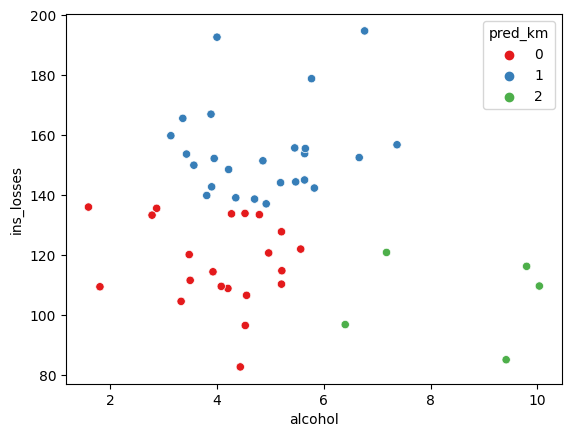

In [74]:
sns.scatterplot(data = df_pred, x = "alcohol", y= "ins_losses", hue="pred_km", palette="Set1")

## Agglomerative Clustering

In [77]:
from sklearn.cluster import AgglomerativeClustering

In [78]:
model_ac = AgglomerativeClustering(n_clusters=3)
model_ac.fit(df_scaled)

AgglomerativeClustering(n_clusters=3)

In [82]:
df_pred["pred_ac"] = model_ac.fit_predict(df_scaled)
df_pred.head()

,alcohol,ins_losses,pred_km,pred_ac
abbrev,,,,
AL,5.640,145.08,1,0
AK,4.525,133.93,0,0
AZ,5.208,110.35,0,1
AR,5.824,142.39,1,0
CA,3.360,165.63,1,0


In [83]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Agglomerative clustering')

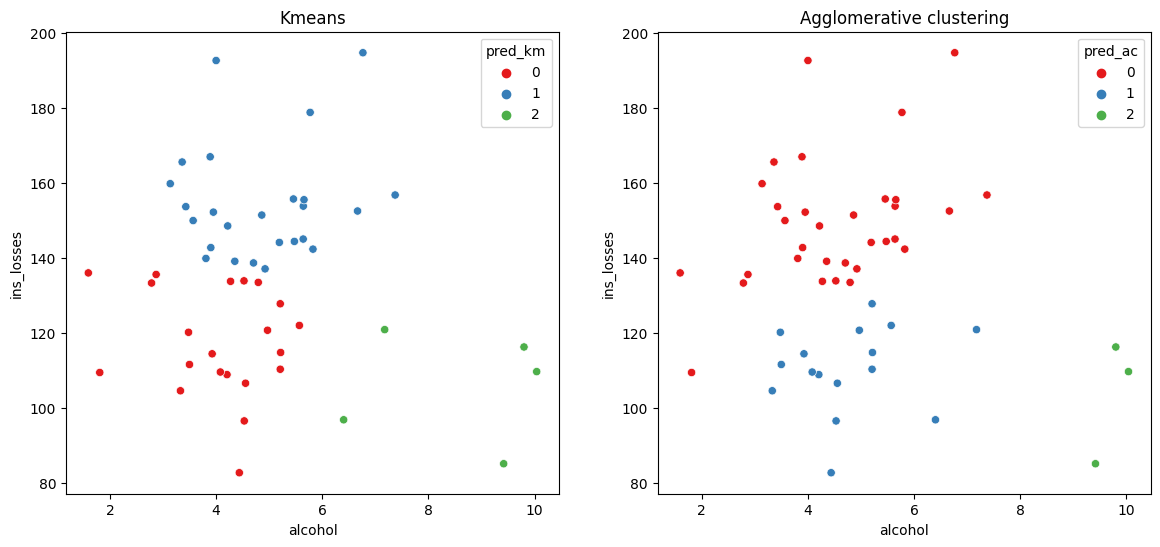

In [88]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

sns.scatterplot(data = df_pred, x="alcohol", y="ins_losses", hue= "pred_km", palette="Set1",ax = ax1 )
sns.scatterplot(data = df_pred, x="alcohol", y="ins_losses", hue= "pred_ac", palette="Set1",ax = ax2 )
ax1.set_title("Kmeans")
ax2.set_title("Agglomerative clustering")

## Spectral clustering

In [89]:
from sklearn.cluster import SpectralClustering

In [90]:
model_sc = SpectralClustering(n_clusters=3)
model_sc.fit(df_scaled)

SpectralClustering(n_clusters=3)

In [92]:
df_pred["pred_sc"] = model_sc.fit_predict(df_scaled)
df_pred.head()

,alcohol,ins_losses,pred_km,pred_ac,pred_sc
abbrev,,,,,
AL,5.640,145.08,1,0,0
AK,4.525,133.93,0,0,2
AZ,5.208,110.35,0,1,2
AR,5.824,142.39,1,0,0
CA,3.360,165.63,1,0,0


Text(0.5, 1.0, 'Spectral Clustering')

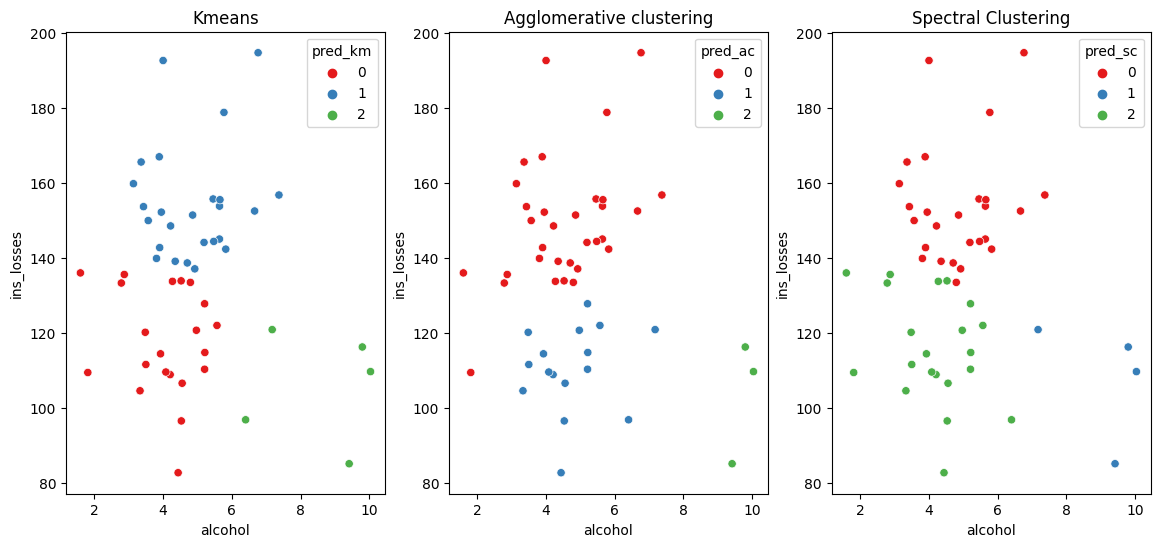

In [94]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 6))

sns.scatterplot(data = df_pred, x="alcohol", y="ins_losses", hue= "pred_km", palette="Set1",ax = ax1 )
sns.scatterplot(data = df_pred, x="alcohol", y="ins_losses", hue= "pred_ac", palette="Set1",ax = ax2 )
sns.scatterplot(data = df_pred, x="alcohol", y="ins_losses", hue= "pred_sc", palette="Set1",ax = ax3 )
ax1.set_title("Kmeans")
ax2.set_title("Agglomerative clustering")
ax3.set_title("Spectral Clustering")

there are 3 differerntes groups for creating campaigns to reduce car accidents due to alcohol consumption controlling the impact of insurance companies' losses: 

1) Higher ins_losses and lower alcohol

2) Lower ins_losses and lower alcohol

3) Lower ins_losses and higher alcohol